<a href="https://colab.research.google.com/github/LiQuinChing/DL-labs/blob/main/DLlab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
a = np.random.rand(4,4)
a

array([[0.96754901, 0.42842695, 0.33437371, 0.89133422],
       [0.33209313, 0.27196923, 0.17618035, 0.19796935],
       [0.23186916, 0.80408908, 0.30992495, 0.89789021],
       [0.7750441 , 0.16248223, 0.38571983, 0.76093776]])

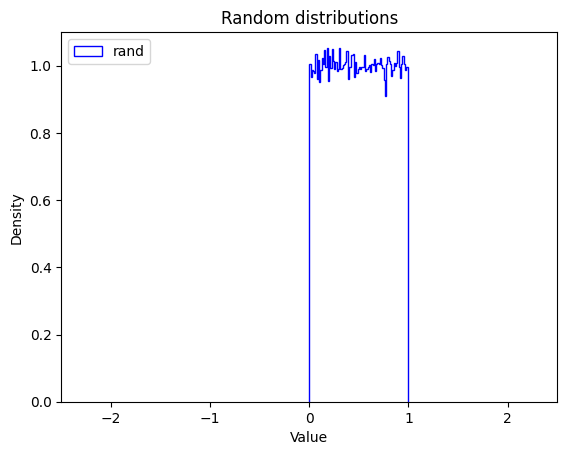

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(np.random.rand(100000), density=True, bins=80, histtype="step", color="blue",
label="rand")
plt.axis([-2.5, 2.5, 0, 1.1])
plt.legend(loc = "upper left")
plt.title("Random distributions")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()


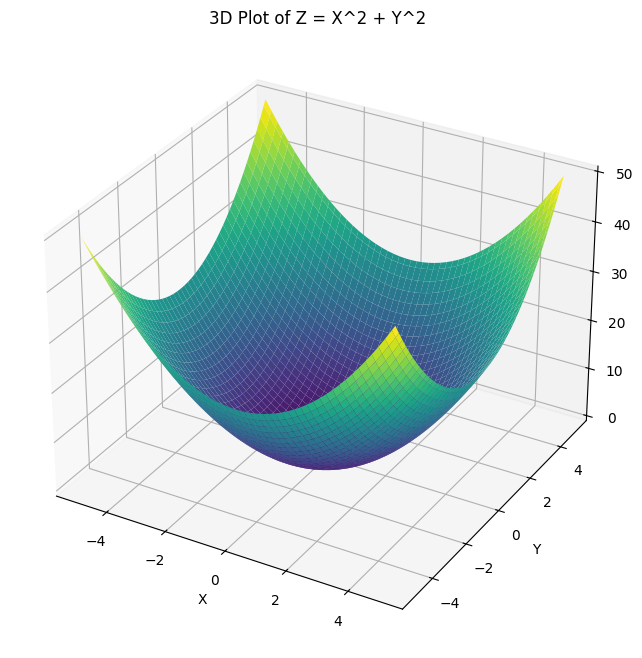

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Create a figure and a 3D subplot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Generate X and Y data
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

# Create a meshgrid for X and Y
X, Y = np.meshgrid(x, y)

# Calculate Z values
Z = X**2 + Y**2

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='viridis')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Plot of Z = X^2 + Y^2')

# Display the plot
plt.show()

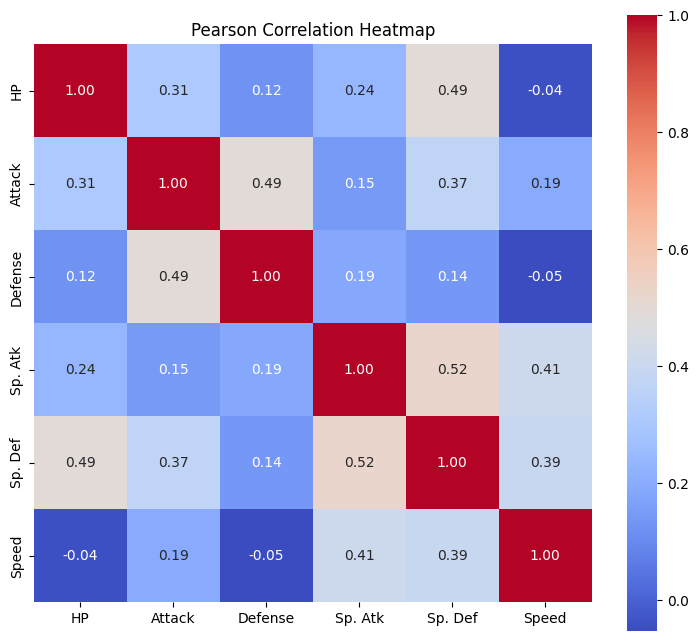

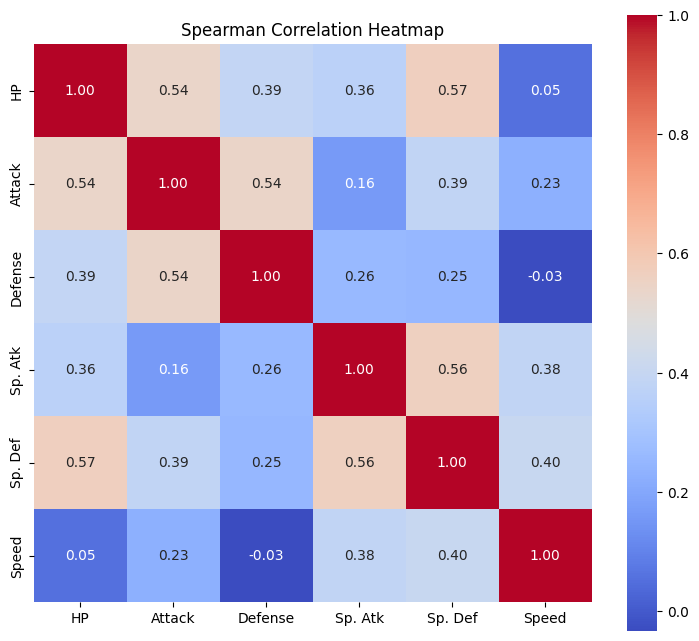

In [20]:
# Pandas for managing datasets
import pandas as pd
!wget -q https://elitedatascience.com/wp-content/uploads/2022/07/Pokemon.csv
# Read dataset
df = pd.read_csv('Pokemon.csv', index_col=0, encoding='latin')
# Seaborn for plotting and styling
import seaborn as sns

# Select only the relevant numerical columns
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
stats_df = df[features]

 # --- Pearson Correlation ---
pearson_corr = stats_df.corr(method='pearson')

plt.figure(figsize=(9, 8))
sns.heatmap(pearson_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Pearson Correlation Heatmap")
plt.show()

# --- Spearman Correlation ---
spearman_corr = stats_df.corr(method='spearman')

plt.figure(figsize=(9, 8))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Spearman Correlation Heatmap")
plt.show()


In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

Saving Au_nanoparticle_dataset.csv to Au_nanoparticle_dataset.csv


In [34]:
df = pd.read_csv('Au_nanoparticle_dataset.csv')

# 1. Create new dataframe with only selected features
selected_features = ['N_total', 'N_bulk', 'N_surface', 'R_avg']
new_df = df[selected_features]

# 2. Display first 20 samples
print("First 20 samples:")
display(new_df.head(20))


First 20 samples:


,N_total,N_bulk,N_surface,R_avg
0,1599,1014,585,17.3706
1,1642,1034,608,17.6061
2,4637,3365,1272,25.3692
3,7189,5292,1897,29.7011
4,11004,8508,2496,34.2831
5,13375,10768,2607,36.6334
6,13795,11155,2640,37.0108
7,13947,11304,2643,37.1672
8,14020,11357,2663,37.2103
9,14056,11389,2667,37.2467


In [35]:
print("\nMean values:\n", new_df.mean())
print("\nStandard deviations:\n", new_df.std())
print("\nQuartiles:\n", new_df.quantile([0.25, 0.5, 0.75]))



Mean values:
 N_total      3476.786500
N_bulk       2521.550250
N_surface     955.236250
R_avg          20.654363
dtype: float64

Standard deviations:
 N_total      3679.286769
N_bulk       2976.232459
N_surface     721.870220
R_avg           7.610716
dtype: float64

Quartiles:
       N_total   N_bulk  N_surface      R_avg
0.25   1061.0   618.75     437.00  15.160725
0.50   1867.0  1199.00     666.00  18.629250
0.75   4503.0  3183.00    1301.75  25.525125


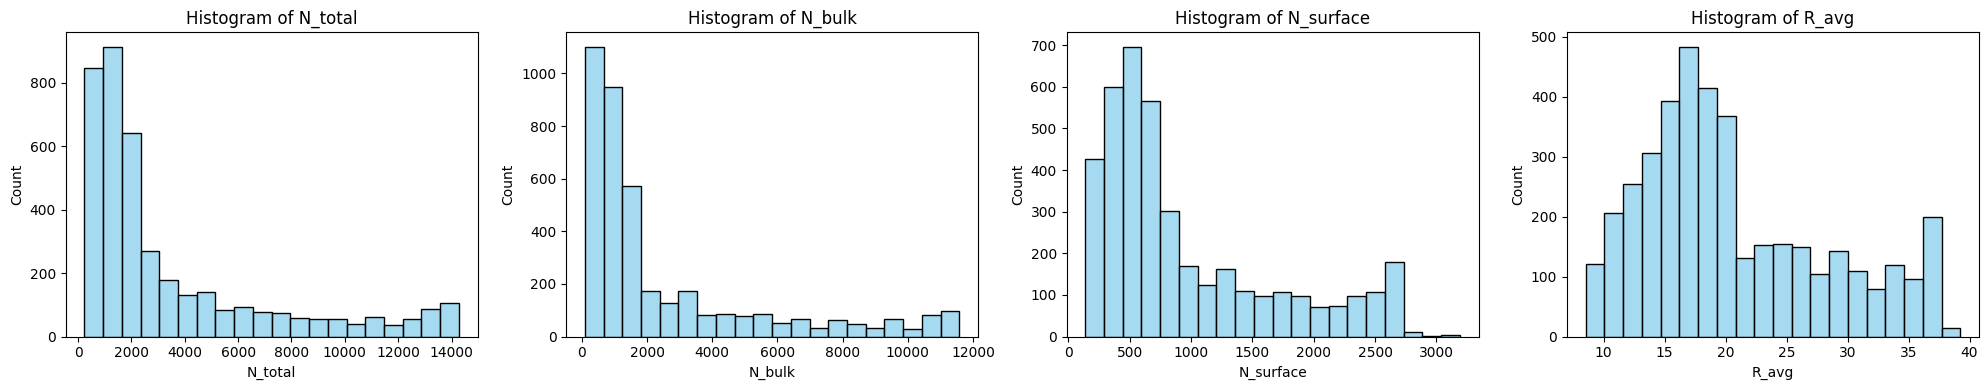

In [36]:
# Plot histograms in a grid layout
plt.figure(figsize=(20, 4))
for i, col in enumerate(new_df.columns):
    plt.subplot(1, 4, i + 1)
    sns.histplot(new_df[col], kde=False, bins=20, color='skyblue')
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

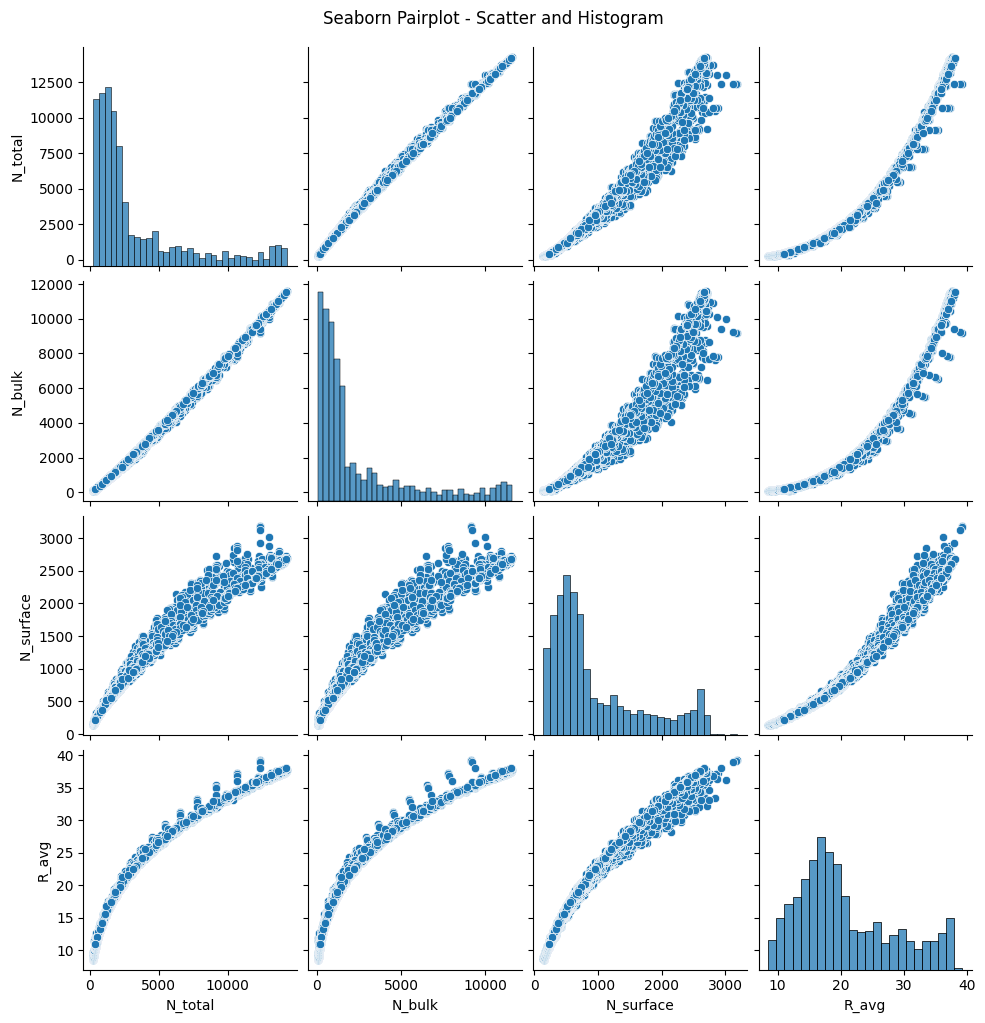

In [39]:
#Pairplot (scatter + histogram + KDE)
sns.pairplot(new_df)
plt.suptitle("Seaborn Pairplot - Scatter and Histogram", y=1.02)
plt.show()

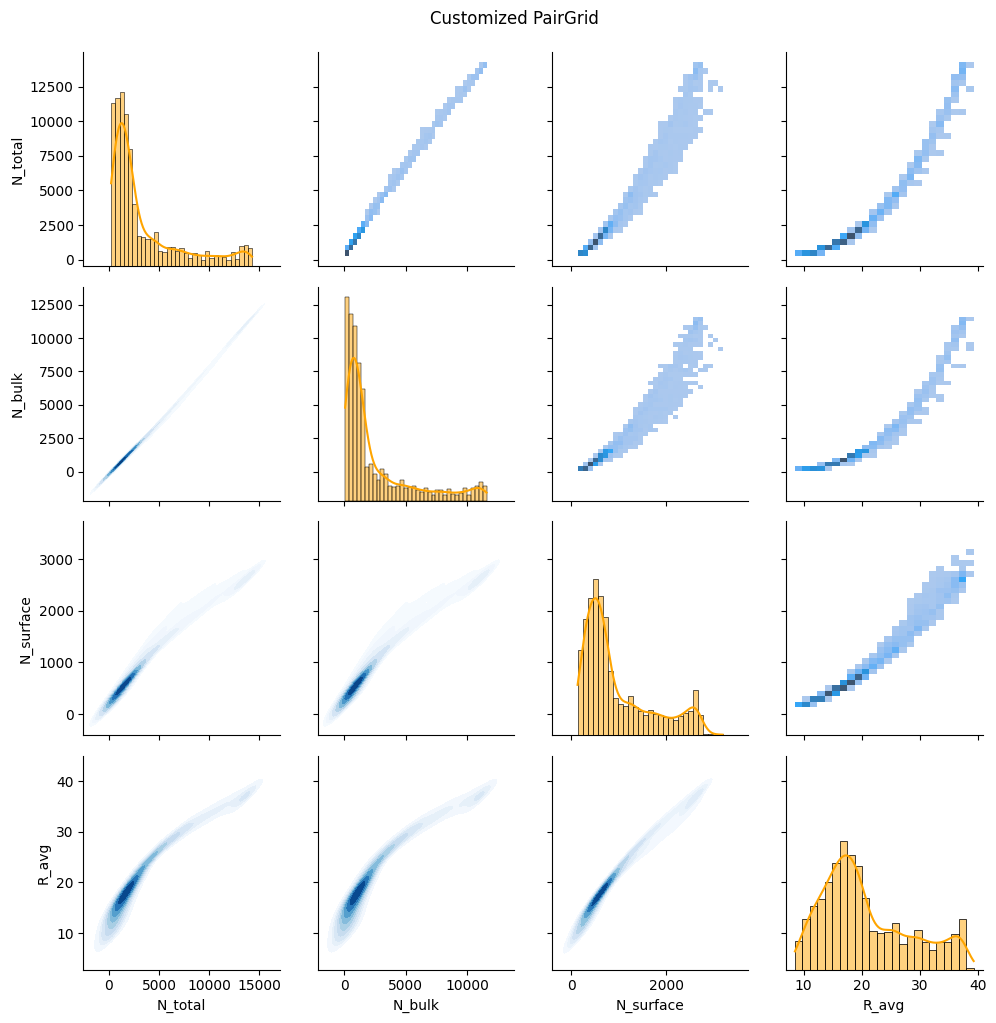

In [40]:
# Customized PairGrid with KDE & Histogram
g = sns.PairGrid(new_df)
g.map_upper(sns.histplot)                          # Bivariate histograms on upper triangle
g.map_diag(sns.histplot, kde=True, color='orange') # Histogram + KDE on diagonal
g.map_lower(sns.kdeplot, fill=True, cmap='Blues')  # Bivariate KDE on lower triangle
plt.suptitle("Customized PairGrid", y=1.02)
plt.show()